In [78]:
import pandas as pd
import glob
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt

In [57]:
#Reading Dataset
path = "Dataset_clean.csv"
dataset = pd.read_csv(path)

In [43]:
# dataset[dataset['Label'] == 'Bot'].shape[0]

In [44]:
newdf = pd.DataFrame()

#oversampling
category = dataset['Label'].unique()

for i in category:
    tmp = dataset[dataset['Label'] == i]
    val = tmp.shape[0]
    
    tmp = tmp.sample(171509,replace=True)
    newdf = pd.concat([newdf,tmp],axis=0)
    

In [45]:
dataset.shape,newdf.shape

((2425727, 79), (2572635, 79))

In [46]:
newdf['Label'].value_counts()

DoS_slowloris               171509
Infiltration                171509
DoS_Hulk                    171509
BENIGN                      171509
Bot                         171509
Web_Attack_XSS              171509
Heartbleed                  171509
DoS_GoldenEye               171509
PortScan                    171509
Web_Attack_Sql_Injection    171509
SSH_Patator                 171509
Web_Attack_Brute_Force      171509
DDoS                        171509
FTP_Patator                 171509
DoS_Slowhttptest            171509
Name: Label, dtype: int64

In [47]:
dataset = newdf.copy()
del newdf

In [48]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [49]:
del dataset

In [50]:
#changing dtypes of  features columns ("X")
X = X.astype("float64")

In [51]:
# # RobustScaler is used to preserve outliers in the data.
scaler = RobustScaler()
scaler.fit(X)

X = scaler.transform(X)

In [52]:
# X[0]

LABEL ENCODING

In [53]:
LE = LabelEncoder()

LE.fit(y)
y = LE.transform(y)

In [56]:
LE.get_params

array(['BENIGN', 'Bot', 'DDoS', 'DoS_GoldenEye', 'DoS_Hulk',
       'DoS_Slowhttptest', 'DoS_slowloris', 'FTP_Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH_Patator',
       'Web_Attack_Brute_Force', 'Web_Attack_Sql_Injection',
       'Web_Attack_XSS'], dtype=object)

In [55]:
list(LE.classes_)

['BENIGN',
 'Bot',
 'DDoS',
 'DoS_GoldenEye',
 'DoS_Hulk',
 'DoS_Slowhttptest',
 'DoS_slowloris',
 'FTP_Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH_Patator',
 'Web_Attack_Brute_Force',
 'Web_Attack_Sql_Injection',
 'Web_Attack_XSS']

In [36]:
LE.classes_

array(['BENIGN', 'Bot', 'DDoS', 'DoS_GoldenEye', 'DoS_Hulk',
       'DoS_Slowhttptest', 'DoS_slowloris', 'FTP_Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH_Patator',
       'Web_Attack_Brute_Force', 'Web_Attack_Sql_Injection',
       'Web_Attack_XSS'], dtype=object)

In [15]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [16]:
unique, counts = np.unique(y, return_counts = True)
unique, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([171509, 171509, 171509, 171509, 171509, 171509, 171509, 171509,
        171509, 171509, 171509, 171509, 171509, 171509, 171509]))

TRAINING THE MODEL

In [17]:
#from imblearn.over_sampling import SMOTE
#X_resample,y_resample=SMOTE().fit_resample(X,y)

# from imblearn.over_sampling import SMOTE
# for i in range(5):
#     smote = SMOTE(sampling_strategy='minority')
#     X, y = smote.fit_resample(X, y)

In [18]:
# del X
# del y

In [20]:
import pickle
#Dumping the data
X_file = open('feature_data', 'wb')
pickle.dump(X, X_file)   
X_file.close()

y_file = open('label_data', 'wb')
pickle.dump(y, y_file)   
y_file.close()



In [21]:
##pickle load
# X_file = open('feature_data', 'rb')
# X_resample = pickle.load(X_file)   
# X_file.close()

# y_file = open('label_data', 'rb')
# y_resample = pickle.load(y_file)   
# y_file.close()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2058108, 78), (514527, 78), (2058108,), (514527,))

In [23]:
del X
del y

In [24]:
unique, counts = np.unique(y_test, return_counts=True)

In [25]:
unique , counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([34188, 34629, 34519, 34629, 34354, 34046, 34567, 34297, 34065,
        34304, 34438, 33969, 34106, 34120, 34296]))

In [26]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(78,)),
    tf.keras.layers.Dense(67, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
from tensorflow.keras.optimizers import Adam
#compile the model
opt=Adam(clipnorm=1)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
            
             metrics=['accuracy'])

In [28]:
y_train

array([12,  8,  4, ...,  8, 14,  7])

In [29]:
var = model.fit(X_train,
          y_train,
          epochs=10
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
2058108/2058108 [==============================] - 68s 33us/sample - loss: 871.4107 - acc: 0.7277
Epoch 2/10
2058108/2058108 [==============================] - 67s 33us/sample - loss: 2.1715 - acc: 0.7571
Epoch 3/10
2058108/2058108 [==============================] - 67s 33us/sample - loss: 1.4992 - acc: 0.7660
Epoch 4/10
2058108/2058108 [==============================] - 67s 33us/sample - loss: 1.4089 - acc: 0.7699
Epoch 5/10
2058108/2058108 [==============================] - 67s 33us/sample - loss: 1.4152 - acc: 0.7720
Epoch 6/10
2058108/2058108 [==============================] - 67s 33us/sample - loss: 1.6861 - acc: 0.7731
Epoch 7/10
2058108/2058108 [==============================] - 68s 33us/sample - loss: 1.4343 - acc: 0.7746
Epoch 8/10
2058108/2058108 [==============================] - 67s 33us/sample - loss: 1.5808 - acc: 0.7748
Epoch 9/10
2058108/2058108 [====================

In [30]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

In [31]:
y_pred

array([ 0,  4,  0, ..., 11, 10,  6])

In [32]:
# Evaluating model accuracy.
model.evaluate(X_test, y_test, verbose=2)

514527/514527 - 6s - loss: 0.7168 - acc: 0.8049


[0.7167563456461639, 0.8049471]

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     34188
           1       0.97      1.00      0.99     34629
           2       0.98      0.90      0.94     34519
           3       0.97      0.70      0.81     34629
           4       0.99      0.97      0.98     34354
           5       0.99      0.25      0.40     34046
           6       0.34      0.99      0.51     34567
           7       1.00      1.00      1.00     34297
           8       1.00      1.00      1.00     34065
           9       0.97      0.39      0.55     34304
          10       0.98      0.99      0.99     34438
          11       0.99      0.98      0.99     33969
          12       0.92      0.16      0.28     34106
          13       0.94      1.00      0.97     34120
          14       0.55      0.97      0.70     34296

    accuracy                           0.80    514527
   macro avg       0.90      0.80      0.80    514527
weighted avg       0.90   

In [34]:
# Saving the model.

model.save('IDS_model_NN.h5')

In [ ]:
# !kill -9 -1

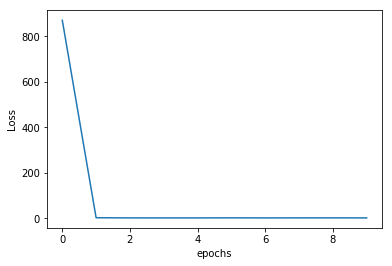

<Figure size 432x288 with 0 Axes>

In [91]:
plt.plot(var.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('NN_loss.jpg')
# plt.savefig('foo.png')

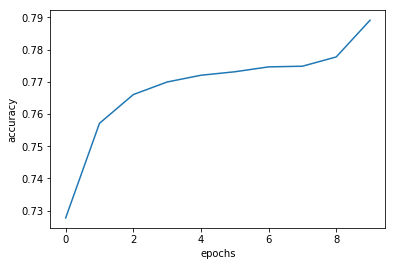

<Figure size 432x288 with 0 Axes>

In [92]:
plt.plot(var.history['acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('NN_accuracy.jpg')

Rough - Analysing the dataset

In [60]:
desc_data = dataset.describe()

In [61]:
type(desc_data)

pandas.core.frame.DataFrame

In [62]:
desc_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,...,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06,2.425727e+06
mean,8.872826e+03,1.723340e+07,1.062010e+01,1.197819e+01,6.341473e+02,1.885255e+04,2.394870e+02,1.917622e+01,6.520192e+01,8.033692e+01,...,6.222595e+00,-3.204140e+03,9.516769e+04,4.800215e+04,1.787589e+05,6.802929e+04,9.702533e+06,5.879692e+05,1.014565e+07,9.240407e+06
std,1.924661e+04,3.575738e+07,8.098363e+02,1.077433e+03,1.079310e+04,2.444719e+06,7.698434e+02,6.151951e+01,1.990128e+02,3.022424e+02,...,6.875032e+02,1.172073e+06,6.997328e+05,4.245672e+05,1.106095e+06,6.228798e+05,2.525950e+07,4.967455e+06,2.603948e+07,2.499339e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.360000e+02,2.000000e+00,1.000000e+00,2.400000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.051800e+04,2.000000e+00,2.000000e+00,6.800000e+01,1.620000e+02,4.100000e+01,2.000000e+00,3.700000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.562252e+06,6.000000e+00,5.000000e+00,3.470000e+02,1.596000e+03,2.280000e+02,3.700000e+01,5.300000e+01,7.868654e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [66]:
mean_array = np.array(desc_data.loc['mean'])

In [68]:
column_array = desc_data.columns

In [69]:
column_array

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [72]:
mystr="22	1303488	41	42	2728	6634	456	0	66.53658537	110.1299454	976	0	157.952381	319.1214275	7182.267884	63.6753081	15896.19512	106554.899	956551	0	1303488	32587.2	160397.0499	997357	1	346851	8459.780488	23962.23892	138295	0	0	0	0	0	1328	1360	31.45406785	32.22124024	0	976	111.452381	241.6427915	58391.23867	0	0	0	1	0	0	0	0	1	112.7951807	66.53658537	157.952381	1328	0	0	0	0	0	0	41	2728	42	6634	29200	243	24	32	0	0	0	0	0	0	0	0	BENIGN"
mystr=mystr.split('\t')
len(mystr)

79

In [74]:
my_str = "13.35.133.77	172.27.30.190	443	57692	6	2022-04-18 19:42:54	18712.9974365234	28055.3664254408	374.071552339211	213.755172765263	160.316379573948	4	3	327	198	105	66	81.75	16.6188898546203	66	66	66	0	105	66	75	14.7841614091374	218.571428571429	80	60	20	2	3118.83290608724	18466.9494628906	0.95367431640625	6863.98558016872	18712.9974365234	18571.138381958	0.95367431640625	6237.66581217448	8721.26924410281	199.079513549805	189.065933227539	10.0135803222656	99.5397567749023	89.5261764526367	0	0	0	0	1	0	0	0	0	0	0	0.75	75	133	501	0	0	0	0	0	0	0	0	0	0	0	0	0	0	81.75	66	0	4	3	327	198"

In [75]:
len(my_str.split('\t'))

82

In [ ]:
df2